In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
#---------------------------------------
import logging
import warnings
logging.getLogger().setLevel(logging.ERROR)
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')


2025-04-16 05:05:59.514595: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-16 05:05:59.521522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744758359.529329  617485 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744758359.531689  617485 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744758359.537913  617485 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Load Training Data

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [ ]:
tr_df = train_df('/home/readinggroup/Desktop/K_venv/dl/MRI/Training')
tr_df

,Class Path,Class
0,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
1,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
2,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
3,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
4,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
...,...,...
5707,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5708,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5709,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5710,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma


# Load Test Data

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
ts_df = test_df('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing')
ts_df

,Class Path,Class
0,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
1,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
2,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
3,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
4,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
...,...,...
1306,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1307,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1308,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1309,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma


# Number of images in each class in train data

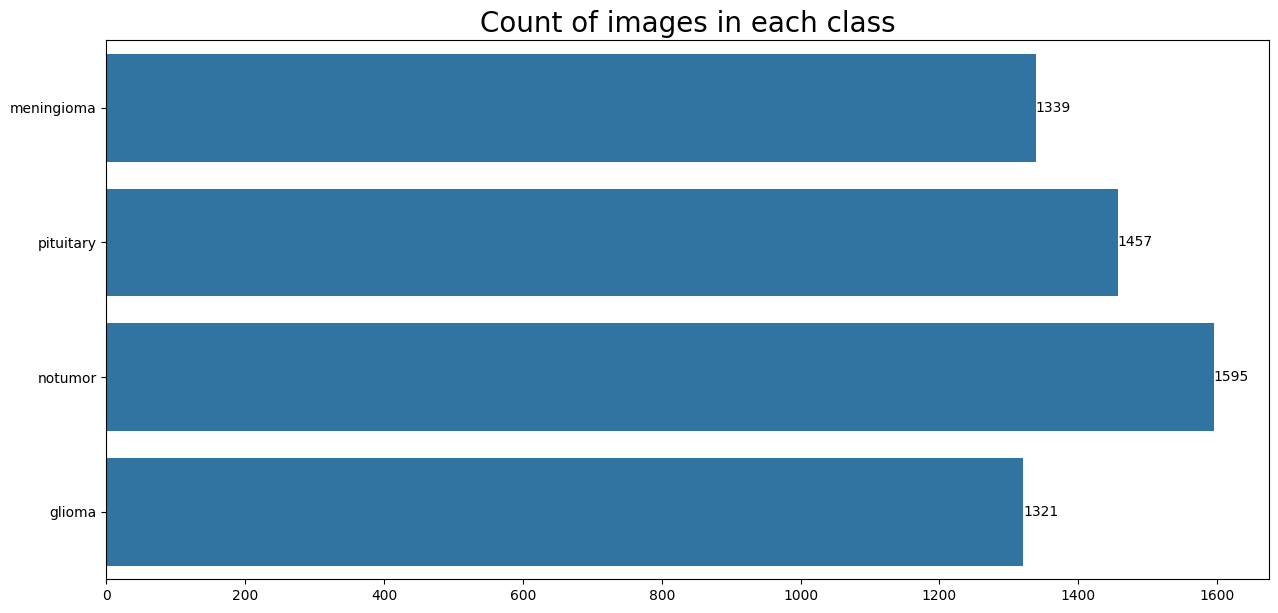

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Count each class in test data

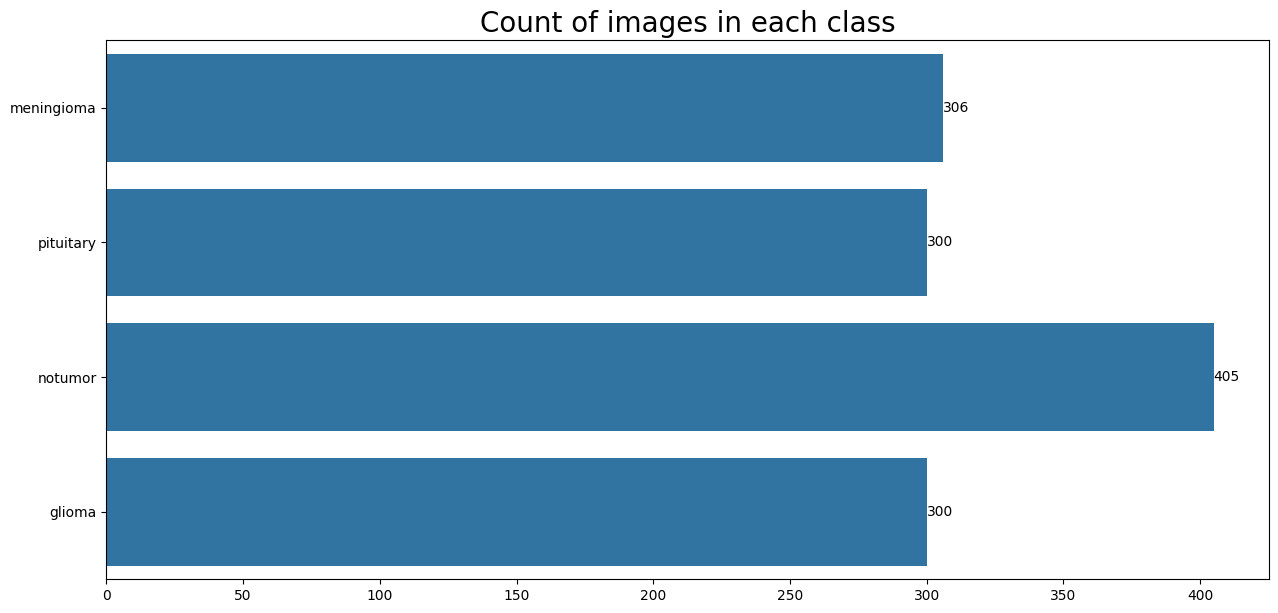

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Splitting dataset

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])
valid_df

,Class Path,Class
1297,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
18,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
367,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,pituitary
73,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
1120,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
...,...,...
1070,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
860,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,notumor
1284,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
194,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma


# Data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = (227, 227)
seed = 42

# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

# No augmentation for validation and test
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
tr_gen = train_datagen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    seed=seed
)

# Validation generator
valid_gen = test_val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=seed
)

# Test generator
ts_gen = test_val_datagen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=seed
)

print("Class indices:", tr_gen.class_indices)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Getting samples from data

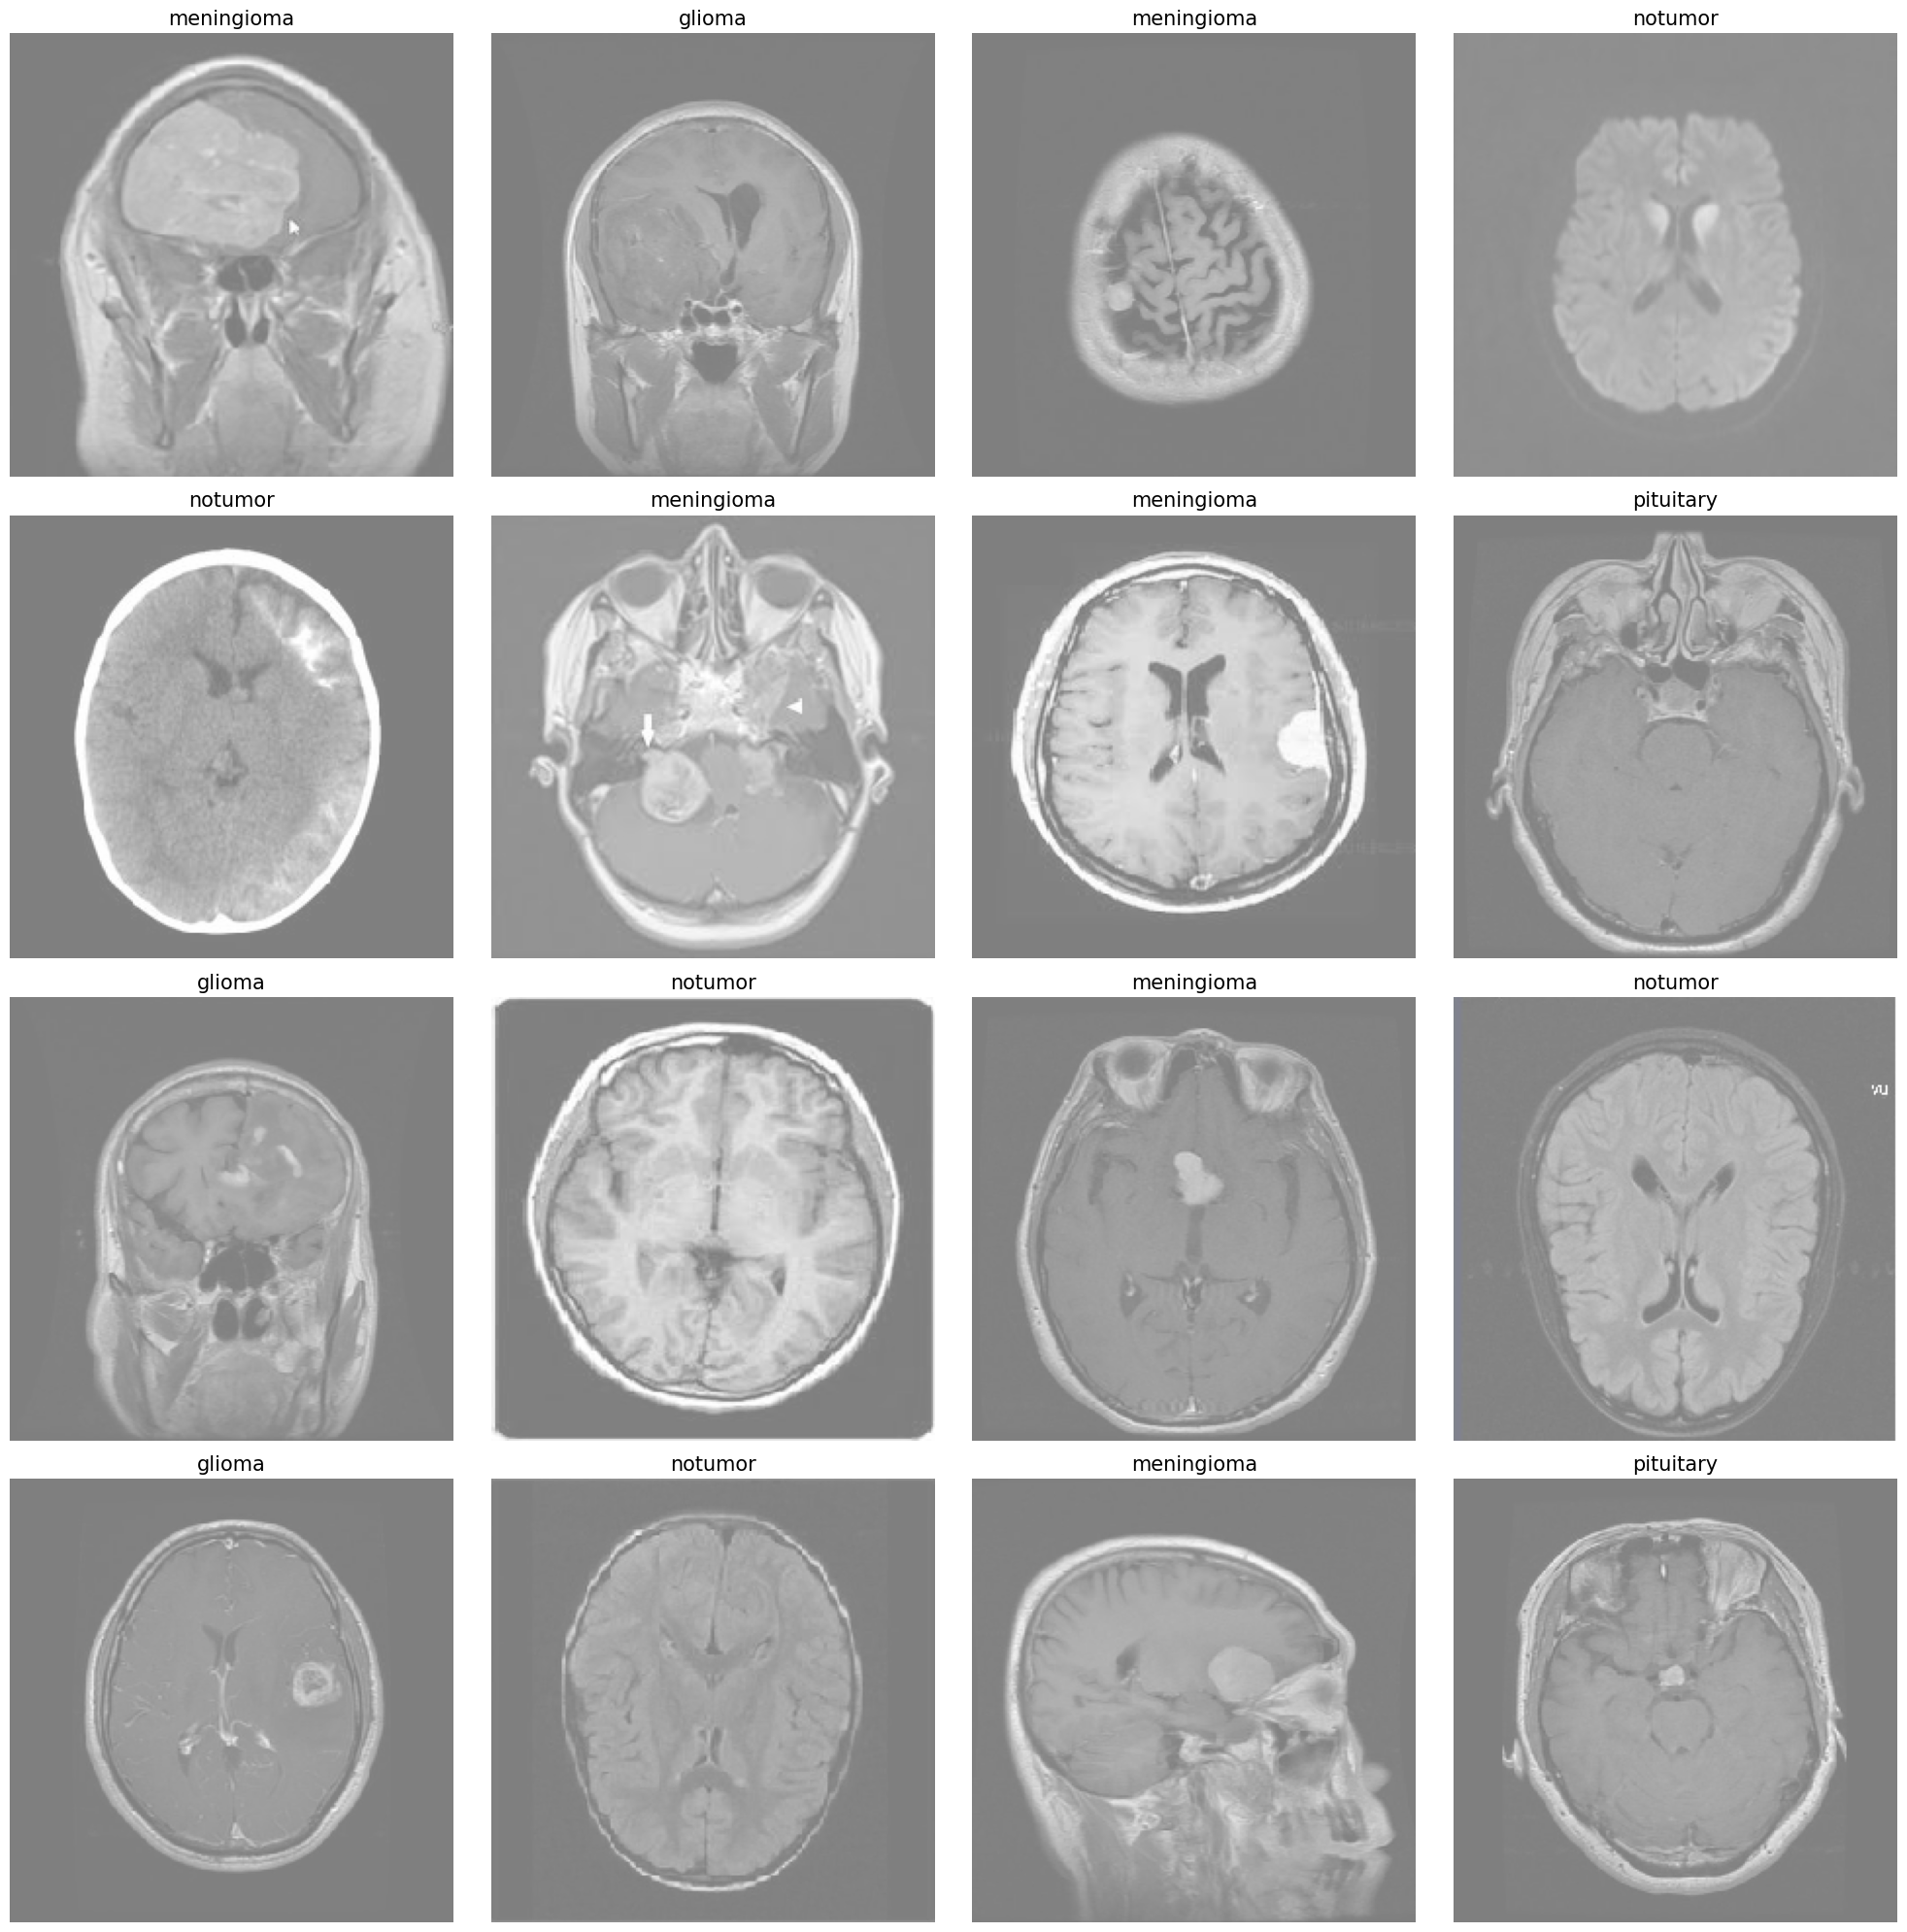

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, i + 1)

    image_vis = (image + 1.0) / 2.0
    image_vis = np.clip(image_vis, 0, 1)

    plt.imshow(image_vis)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Building the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.metrics import Precision, Recall

# image shape for AlexNet
img_shape = (227, 227, 3)

# Build AlexNet model
model = Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=img_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Flatten(),
    Dense(2048, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(2048, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9
)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()


I0000 00:00:1744758361.162278  617485 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 998 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │    18,876,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,829,572 (102.35 MB)

 Trainable params: 26,828,868 (102.34 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


# Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

hist = model.fit(tr_gen,
                 epochs=1000,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=[early_stopping, checkpoint])


Epoch 1/1000


I0000 00:00:1744758362.917706  617656 service.cc:152] XLA service 0x77d29c013b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744758362.917721  617656 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2025-04-16 05:06:02.963975: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744758363.142966  617656 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-16 05:06:04.077385: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 730.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-04-16 05:06:04.201629: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran o

  3/179 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.3021 - loss: 56.0300 - precision: 0.3045 - recall: 0.2326

I0000 00:00:1744758365.778084  617656 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


178/179 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5199 - loss: 45.8848 - precision: 0.5911 - recall: 0.3703

2025-04-16 05:06:29.504205: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 466.50MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-04-16 05:06:29.533227: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 358.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-04-16 05:06:29.533238: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 679.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-04-16 05:06:29.558479: W external/local_xla/

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5204 - loss: 45.8394 - precision: 0.5917 - recall: 0.3708

2025-04-16 05:06:31.828182: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_207_0', 48 bytes spill stores, 48 bytes spill loads

2025-04-16 05:06:31.850189: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_214', 4 bytes spill stores, 4 bytes spill loads

2025-04-16 05:06:31.884313: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_214', 4 bytes spill stores, 4 bytes spill loads

2025-04-16 05:06:31.971145: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_207', 488 bytes spill stores, 488 bytes spill loads

2025-04-16 05:06:32.047188: I external/local

179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 164ms/step - accuracy: 0.5209 - loss: 45.7945 - precision: 0.5922 - recall: 0.3714 - val_accuracy: 0.2504 - val_loss: 25.3138 - val_precision: 0.3899 - val_recall: 0.2244
Epoch 2/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - accuracy: 0.7215 - loss: 20.8642 - precision: 0.7689 - recall: 0.6431 - val_accuracy: 0.5603 - val_loss: 13.0723 - val_precision: 0.6055 - val_recall: 0.4687
Epoch 3/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.7733 - loss: 10.9754 - precision: 0.8071 - recall: 0.7255 - val_accuracy: 0.7725 - val_loss: 7.2744 - val_precision: 0.8079 - val_recall: 0.7191
Epoch 4/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - accuracy: 0.8061 - loss: 6.3998 - precision: 0.8309 - recall: 0.7727 - val_accuracy: 0.7145 - val_loss: 4.6722 - val_precision: 0.7250 - val_recall: 0.6962
Epoch 5/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - accuracy: 0.8655 - loss: 3.9316 - precision: 0.8795 - recall: 0.8466 - val_accuracy: 0.86

# Visualize model performance

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

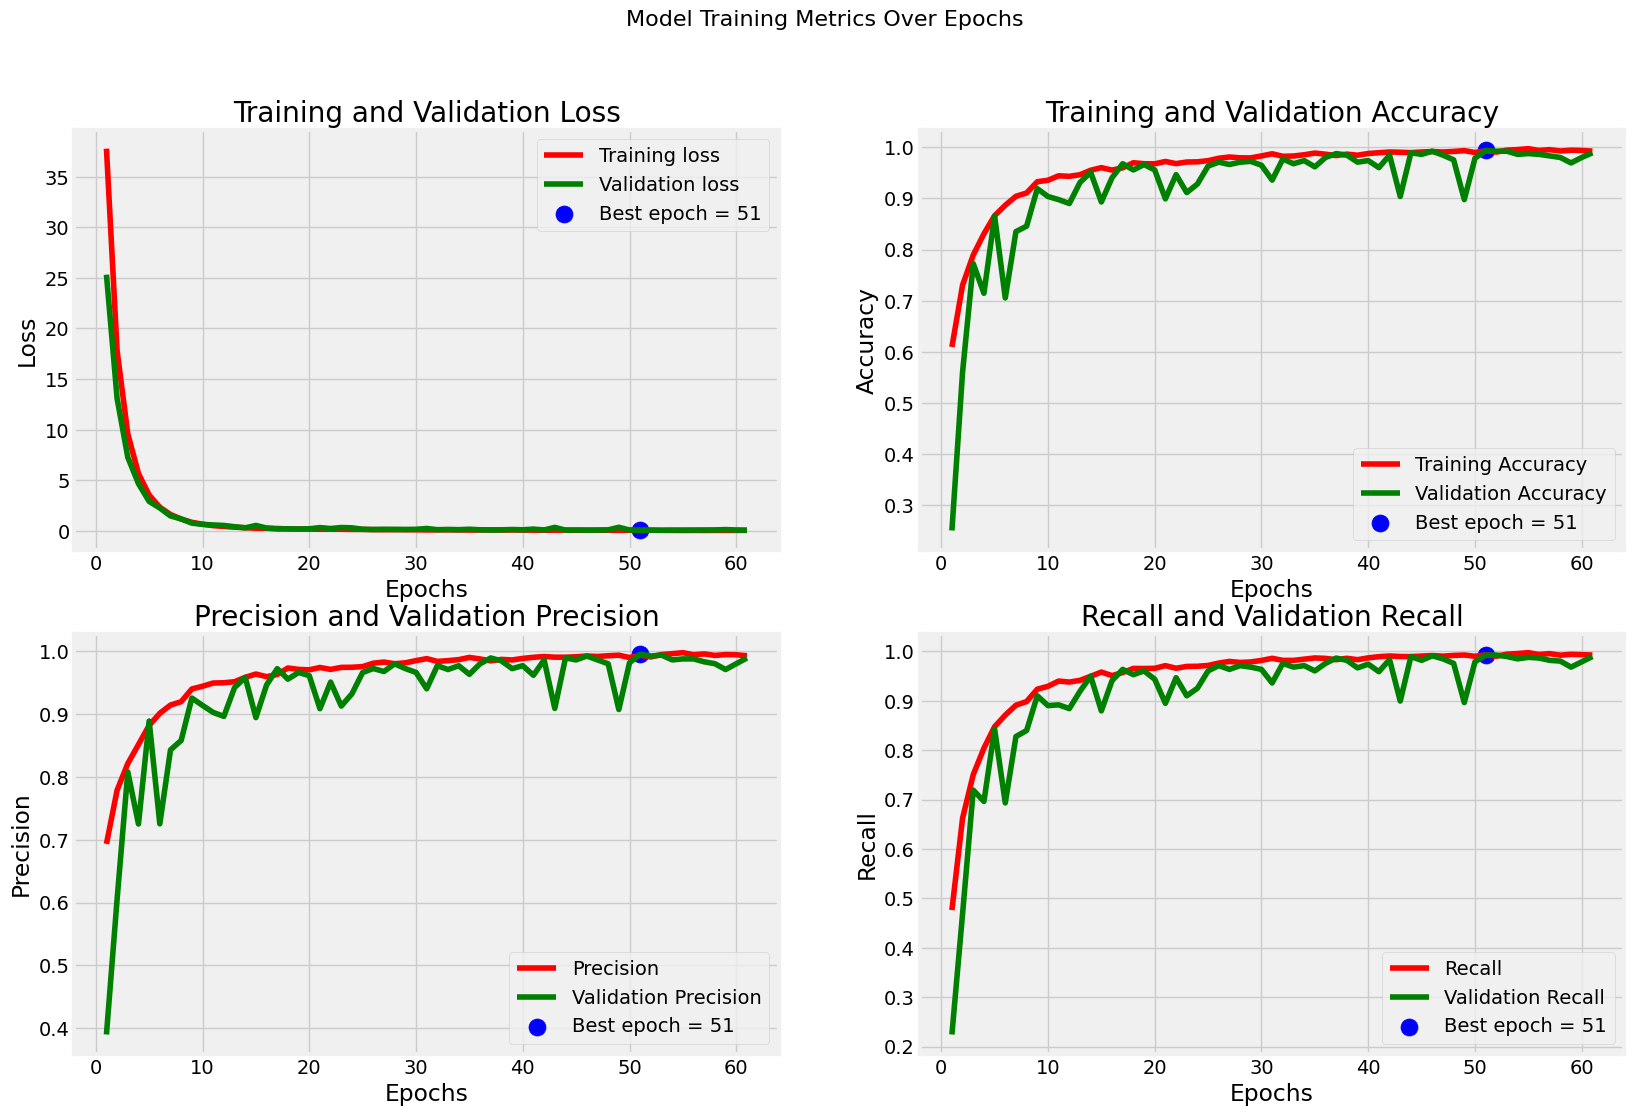

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


# Model Evaluation

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

print(test_score)

178/179 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9952 - loss: 0.0506 - precision: 0.9952 - recall: 0.9946

2025-04-16 05:29:55.080223: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_214', 12 bytes spill stores, 12 bytes spill loads

2025-04-16 05:29:55.092299: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_207', 532 bytes spill stores, 532 bytes spill loads

2025-04-16 05:29:55.203512: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_207', 64 bytes spill stores, 64 bytes spill loads

2025-04-16 05:29:55.375958: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_214', 540 bytes spill stores, 540 bytes spill loads



179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - accuracy: 0.9952 - loss: 0.0506 - precision: 0.9952 - recall: 0.9946
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9981 - loss: 0.0463 - precision: 0.9983 - recall: 0.9965
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0381 - precision: 1.0000 - recall: 1.0000
Train Loss: 0.0491
Train Accuracy: 99.60%
--------------------
Validation Loss: 0.0635
Validation Accuracy: 99.39%
--------------------
Test Loss: 0.0370
Test Accuracy: 100.00%
[0.03697540611028671, 1.0, 1.0, 1.0]


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


# Confusion matrix

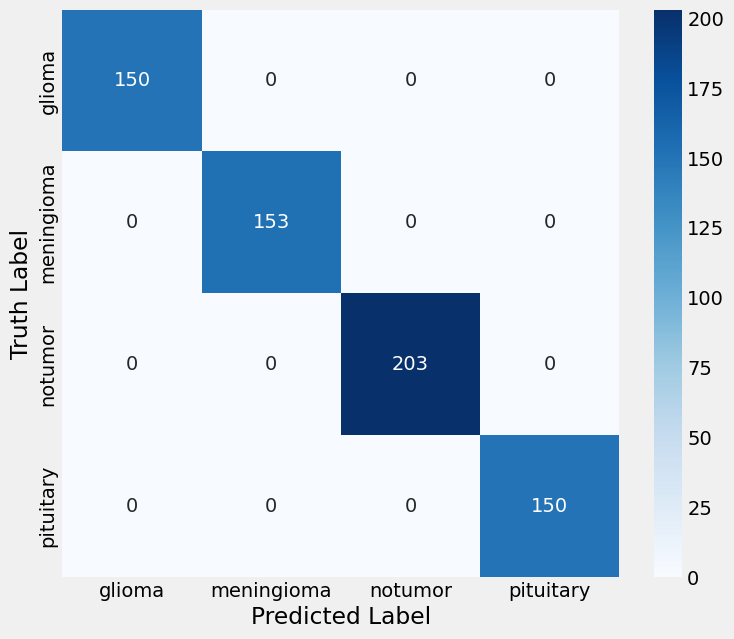

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

# Classification report

In [ ]:
report = classification_report(ts_gen.classes, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       150

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656



# Testing

In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image

    # Generator label order
    labels = list(tr_gen.class_indices.keys())

    plt.figure(figsize=(12, 12))

    # Load and resize image
    img = Image.open(img_path).convert('RGB')
    resized_img = img.resize((227, 227))
    img = np.asarray(resized_img)

    # Scale image to [0, 1]
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # Predict with the model
    predictions = model.predict(img)
    probs = list(predictions[0])

    # Plotting
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.axis('off')
    plt.title("Input Image")

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs, color='skyblue')
    plt.xlabel('Probability', fontsize=15)
    plt.title("Class Probabilities")
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


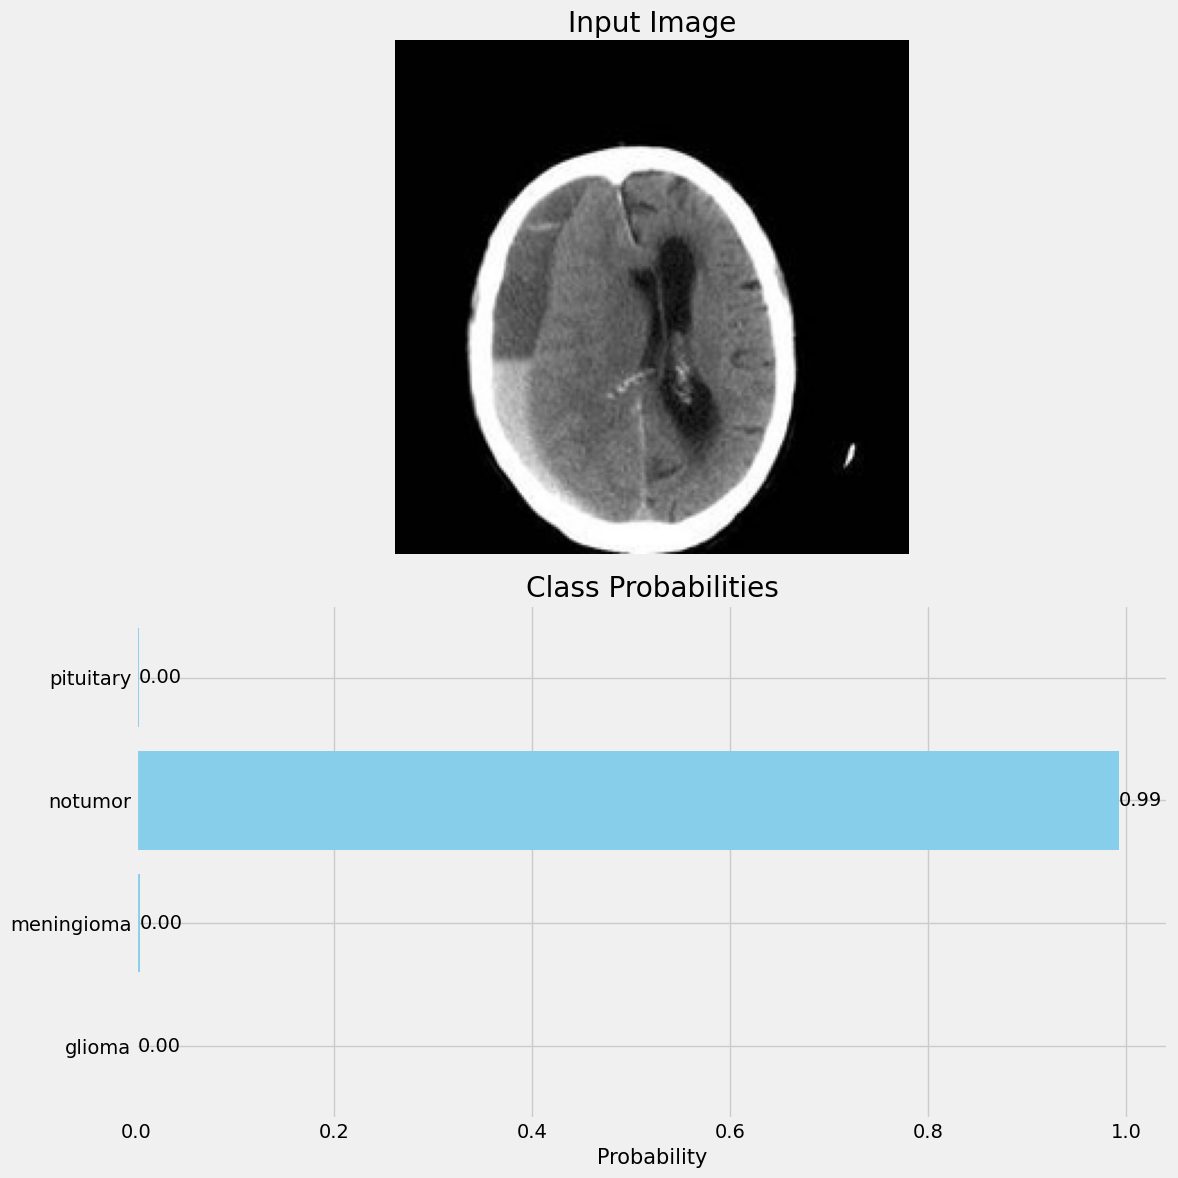

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/notumor/Te-noTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


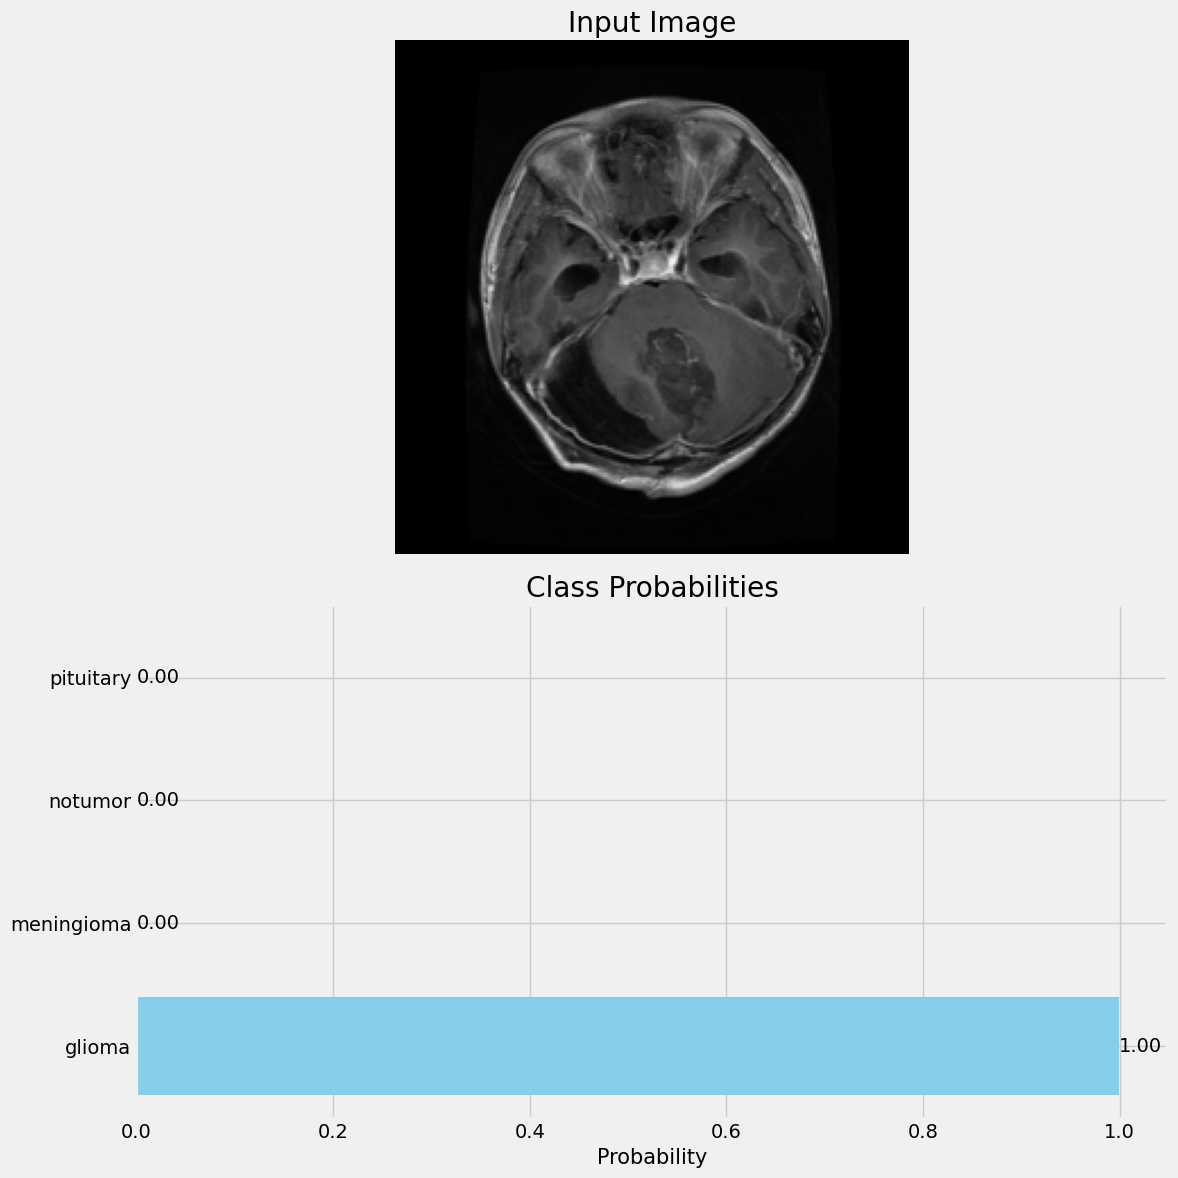

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/glioma/Te-glTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


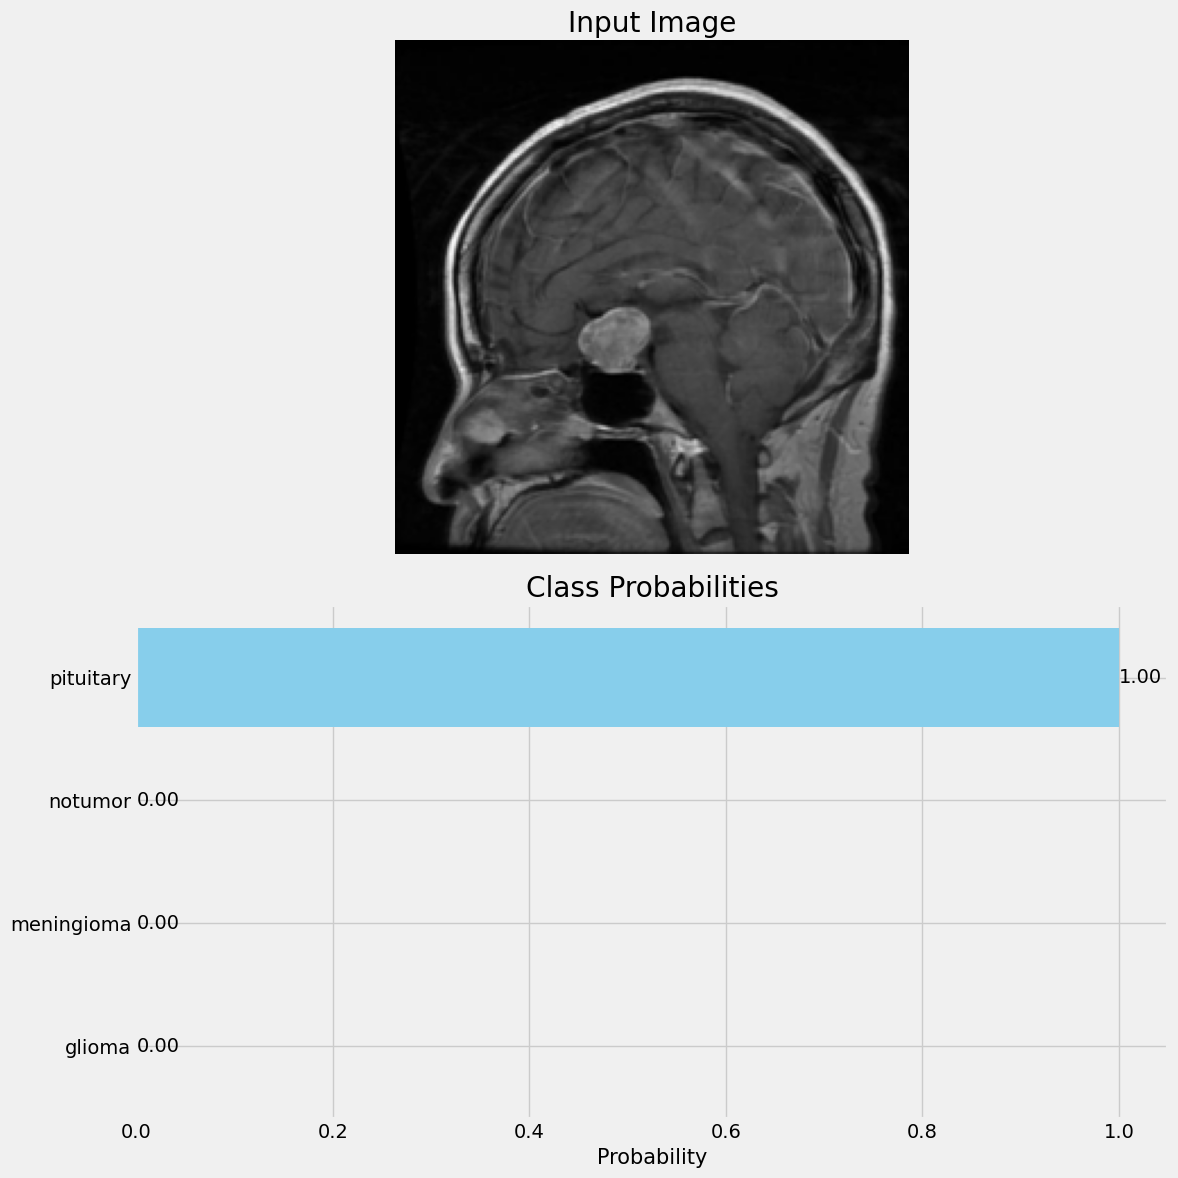

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/pituitary/Te-piTr_0008.jpg')

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()